<a href="https://colab.research.google.com/github/a1ire3a/HistogramEqualization/blob/main/Image_proc_HistogramEQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***HISTOGRAM EQUALIZATION***

In [ ]:
import numpy as np
import cv2
import urllib.request as url
from matplotlib import pyplot as plt

In [ ]:
def histogram(image):
    m, n = image.shape
    h = [0.0] * 256
    for i in range(m):
	    for j in range(n):
		    h[image[i, j]]+=1
    hist =  np.array(h)
    plt.plot(hist)
    return (hist)

In [ ]:
def SK(hist, N):
    cdf = np.zeros(256, dtype=int)
    cdf[0] = hist[0]
    for i in range(1, hist.size):
        cdf[i] = cdf[i-1] + hist[i]
    sk = (255 * cdf / N).astype(int)
    plt.plot(sk)
    return (sk)

In [ ]:
def newImg(sk, image):
    img_new = sk[image.flatten()]
    img_new = np.reshape(img_new, image.shape)
    histogram(np.asarray(img_new).astype(int))
    return (img_new)

In [ ]:
def compareImg(img1, img2):
    fig = plt.figure()
    fig.set_figheight(15)
    fig.set_figwidth(15)
    fig.add_subplot(1,2,1)
    plt.imshow(img1, cmap='gray')
    fig.add_subplot(1,2,2)
    plt.imshow(img2, cmap='gray')
    plt.show(block=True)

# **Test 1:**

In [ ]:
req = url.urlopen("https://images.freeimages.com/images/large-previews/0da/manhattan-bridge-1-1170775.jpg")
imgArr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(imgArr, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (int(img.shape[1]/2),int(img.shape[0]/2)))

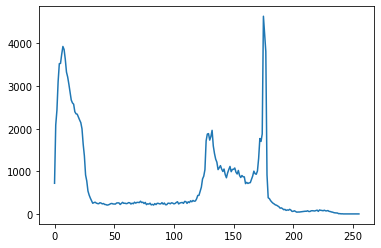

In [ ]:
hist = histogram(img)

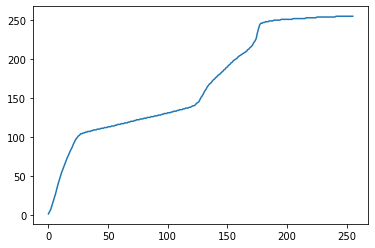

In [ ]:
sk = SK(hist, np.size(img.flatten()))

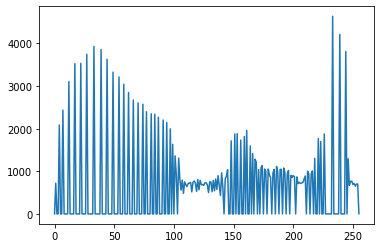

In [ ]:
new = newImg(sk, img)

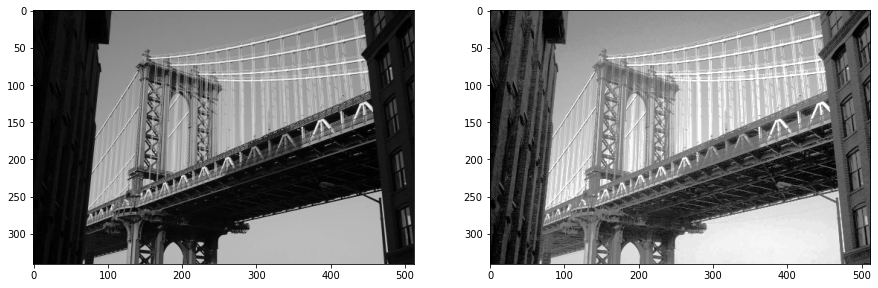

In [ ]:
compareImg(img,new)

# **Test 2:**

In [ ]:
req = url.urlopen("https://images.freeimages.com/images/large-previews/e29/cat-1389596.jpg")
imgArr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(imgArr, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (int(img.shape[1]/2),int(img.shape[0]/2)))

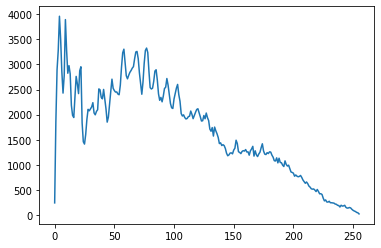

In [ ]:
hist = histogram(img)

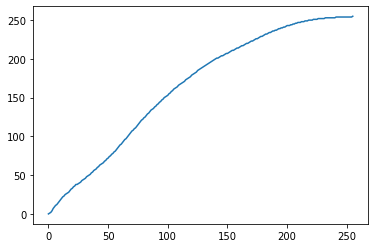

In [ ]:
sk = SK(hist, np.size(img.flatten()))

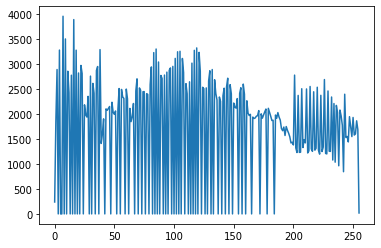

In [ ]:
new = newImg(sk, img)

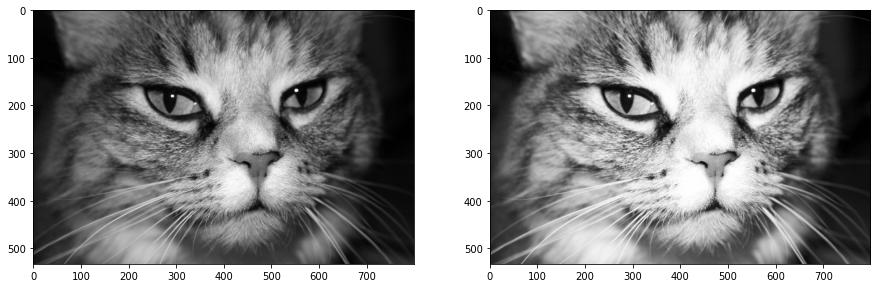

In [ ]:
compareImg(img,new)

# **Test 3:**

In [ ]:
img = cv2.imread('figure 3.8.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (int(img.shape[1]/2),int(img.shape[0]/2)))

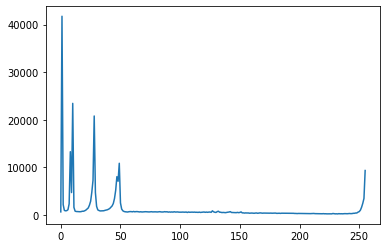

In [ ]:
hist = histogram(img)

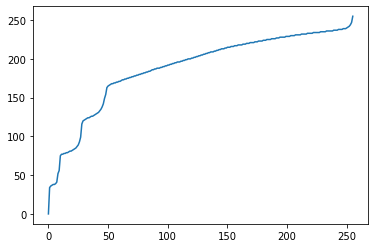

In [ ]:
sk = SK(hist, np.size(img.flatten()))

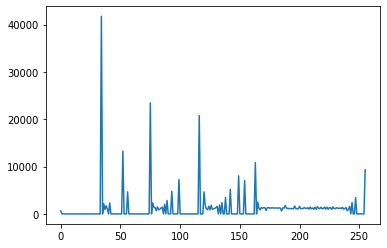

In [ ]:
new = newImg(sk, img)

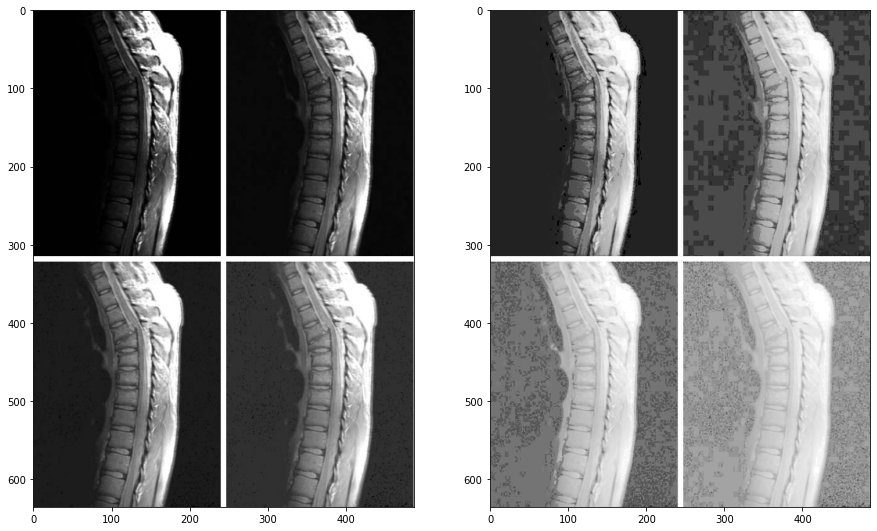

In [ ]:
compareImg(img,new)